### Exploratory Data Analysis on Windows Failed Logon Data

** Objective: **

The dataset is used for this analysis is failed windows logon data. 
<br>Demo is focussed to introduce basic data analysis in python against log data source and plotting visualization to find abnormalities in the trend. The log sample used is a very small subset of logon customized to show some abnormality

**** Investigation :  ****
 - Analyze and indentify any inconsistency in failed logon trend
 - Find the user and check what has changed in failed logon trend
 - Investigate further activity from the user and hosts in scope before and after trend changes

## Global Parameters to Configure (TimeStamp/Host, User for Investigation)

In [1]:
FilteredComputer="WIN-DC01"
FilteredAccount = "SRVACCNT-01"
from datetime import datetime, timedelta
start_datetime = timedelta(days=10)
end_datetime = timedelta(days=1)
my_timespan = timedelta(hours=8)

## Connection to Log Data Source (Python Authentication)
**Kqlmagic Jupyter Extension**: Enables notebook experience, exploring Microsoft Azure Monitor data: Azure Data Explorer (Kusto), ApplicationInsights, and LogAnalytics data, from Jupyter notebook (Python3 kernel), using kql (Kusto Query language).
<br>https://pypi.org/project/Kqlmagic/

### Install the kqlmagic library
> `!pip install Kqlmagic --no-cache-dir --upgrade`

### Reference Usage Notebooks
<br>[Get Started with Kqlmagic for Kusto notebook](https://mybinder.org/v2/gh/Microsoft/jupyter-Kqlmagic/master?filepath=notebooks%2FQuickStart.ipynb)
<br>[Parametrize your Kqlmagic query with Python notebook.](https://mybinder.org/v2/gh/Microsoft/jupyter-Kqlmagic/master?filepath=notebooks%2FParametrizeYourQuery.ipynb)


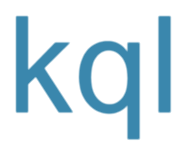

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
%reload_ext Kqlmagic

In [3]:
######################################################
##              AUTHENTICATION                      ##
######################################################

kustocluster = 'demotest.westus'
kustodatabase = "demodb"

#AAD Tenant 
aadtenant = "<insert tenant id>"

# AppId to query Kusto Cluster.
client_id = '<insert client id here>'

#retrive client_secret
client_secret='<insert client secret here>'

#Authntication via AppID for non inteactive authentication.
%kql azure_data-Explorer://tenant=aadtenant;clientid=client_id;clientsecret=client_secret;cluster=kustocluster;database=kustodatabase

<IPython.core.display.Javascript object>

<br>For demo purposes, already aggregated dataset with distinct host count is ingested into kusto Table WinLogon
<br>Failed logon query against your entire Logon dataset with distint count may look like below. 
<br>4625 Event Id indicates failed logons

In [4]:
#%%kql
#let _startdate = start_datetime;
#let _enddate = end_datetime;
# WindowsLogTable 
#| where startdate < _startdate and enddate > _enddate
#| where EventId == "Microsoft-Windows-Security-Auditing:4625"
#| summarize LogonCount=count(),SourceCount=dcount(sourceAddress), HostCount=dcount(destinationAddress) by AccountName,Date

In [5]:
%%kql
WinLogon

Date,AccountName,SourceHostCount,DestinationHostCount,LogonCount
3/28/2018,ASHWIN,327,263,46448
3/29/2018,ASHWIN,320,230,46379
3/30/2018,ASHWIN,352,245,44951
3/31/2018,ASHWIN,343,261,44347
4/1/2018,ASHWIN,289,226,44971
4/4/2018,ASHWIN,282,219,45426
4/5/2018,ASHWIN,356,243,44214
4/6/2018,ASHWIN,24,21,28244
3/28/2018,ERIC,159,154,10301
3/29/2018,ERIC,256,156,11770


[{'Date': '3/28/2018', 'SourceHostCount': 327, 'AccountName': 'ASHWIN', 'DestinationHostCount': 263, 'LogonCount': 46448},
 {'Date': '3/29/2018', 'SourceHostCount': 320, 'AccountName': 'ASHWIN', 'DestinationHostCount': 230, 'LogonCount': 46379},
 {'Date': '3/30/2018', 'SourceHostCount': 352, 'AccountName': 'ASHWIN', 'DestinationHostCount': 245, 'LogonCount': 44951},
 {'Date': '3/31/2018', 'SourceHostCount': 343, 'AccountName': 'ASHWIN', 'DestinationHostCount': 261, 'LogonCount': 44347},
 {'Date': '4/1/2018', 'SourceHostCount': 289, 'AccountName': 'ASHWIN', 'DestinationHostCount': 226, 'LogonCount': 44971},
 {'Date': '4/4/2018', 'SourceHostCount': 282, 'AccountName': 'ASHWIN', 'DestinationHostCount': 219, 'LogonCount': 45426},
 {'Date': '4/5/2018', 'SourceHostCount': 356, 'AccountName': 'ASHWIN', 'DestinationHostCount': 243, 'LogonCount': 44214},
 {'Date': '4/6/2018', 'SourceHostCount': 24, 'AccountName': 'ASHWIN', 'DestinationHostCount': 21, 'LogonCount': 28244},
 {'Date': '3/28/2018', 'SourceHostCount': 159, 'AccountName': 'ERIC', 'DestinationHostCount': 154, 'LogonCount': 10301},
 {'Date': '3/29/2018', 'SourceHostCount': 256, 'AccountName': 'ERIC', 'DestinationHostCount': 156, 'LogonCount': 11770},
 {'Date': '3/30/2018', 'SourceHostCount': 318, 'AccountName': 'ERIC', 'DestinationHostCount': 155, 'LogonCount': 17306},
 {'Date': '3/31/2018', 'SourceHostCount': 300, 'AccountName': 'ERIC', 'DestinationHostCount': 155, 'LogonCount': 12039},
 {'Date': '4/1/2018', 'SourceHostCount': 245, 'AccountName': 'ERIC', 'DestinationHostCount': 154, 'LogonCount': 7134},
 {'Date': '4/5/2018', 'SourceHostCount': 208, 'AccountName': 'ERIC', 'DestinationHostCount': 155, 'LogonCount': 12189},
 {'Date': '4/6/2018', 'SourceHostCount': 222, 'AccountName': 'ERIC', 'DestinationHostCount': 153, 'LogonCount': 15110},
 {'Date': '4/7/2018', 'SourceHostCount': 70, 'AccountName': 'ERIC', 'DestinationHostCount': 67, 'LogonCount': 9506},
 {'Date': '3/28/2018', 'SourceHostCount': 8497, 'AccountName': 'JAMES', 'DestinationHostCount': 10046, 'LogonCount': 7792},
 {'Date': '3/29/2018', 'SourceHostCount': 8247, 'AccountName': 'JAMES', 'DestinationHostCount': 10392, 'LogonCount': 7529},
 {'Date': '3/30/2018', 'SourceHostCount': 7514, 'AccountName': 'JAMES', 'DestinationHostCount': 9669, 'LogonCount': 7265},
 {'Date': '3/31/2018', 'SourceHostCount': 8040, 'AccountName': 'JAMES', 'DestinationHostCount': 10467, 'LogonCount': 7991},
 {'Date': '4/1/2018', 'SourceHostCount': 8971, 'AccountName': 'JAMES', 'DestinationHostCount': 10182, 'LogonCount': 7866},
 {'Date': '4/6/2018', 'SourceHostCount': 6444, 'AccountName': 'JAMES', 'DestinationHostCount': 9534, 'LogonCount': 8034},
 {'Date': '4/7/2018', 'SourceHostCount': 7189, 'AccountName': 'JAMES', 'DestinationHostCount': 9823, 'LogonCount': 7272},
 {'Date': '4/8/2018', 'SourceHostCount': 4150, 'AccountName': 'JAMES', 'DestinationHostCount': 6763, 'LogonCount': 3942},
 {'Date': '3/28/2018', 'SourceHostCount': 20728, 'AccountName': 'SRVACCNT-01', 'DestinationHostCount': 7301, 'LogonCount': 154039},
 {'Date': '3/29/2018', 'SourceHostCount': 23032, 'AccountName': 'SRVACCNT-01', 'DestinationHostCount': 8145, 'LogonCount': 150654},
 {'Date': '3/30/2018', 'SourceHostCount': 19451, 'AccountName': 'SRVACCNT-01', 'DestinationHostCount': 7365, 'LogonCount': 155822},
 {'Date': '3/31/2018', 'SourceHostCount': 22033, 'AccountName': 'SRVACCNT-01', 'DestinationHostCount': 8275, 'LogonCount': 133267},
 {'Date': '4/1/2018', 'SourceHostCount': 18460, 'AccountName': 'SRVACCNT-01', 'DestinationHostCount': 7469, 'LogonCount': 195691},
 {'Date': '4/2/2018', 'SourceHostCount': 450, 'AccountName': 'SRVACCNT-01', 'DestinationHostCount': 734, 'LogonCount': 100},
 {'Date': '4/3/2018', 'SourceHostCount': 410, 'AccountName': 'SRVACCNT-01', 'DestinationHostCount': 430, 'LogonCount': 2300},
 {'Date': '4/4/2018', 'SourceHostCount': 19872, 'AccountName': 'SRVACCNT-01', 'DestinationHostCount': 7335, 'LogonCount': 1200},
 {'Date': '3/28/2018', 'SourceHostCount

## Converting the result to dataframe

In [6]:
df = _.to_dataframe()

### Importing python libraries and set global styling parameters

In [7]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pd.set_option('display.max_colwidth', -1)

### Printing Dataset schema

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
Date                    41 non-null object
AccountName             41 non-null object
SourceHostCount         41 non-null int64
DestinationHostCount    41 non-null int64
LogonCount              41 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.7+ KB


### Display Sample records

In [9]:
df.head(5)

,Date,AccountName,SourceHostCount,DestinationHostCount,LogonCount
0,3/28/2018,ASHWIN,327,263,46448
1,3/29/2018,ASHWIN,320,230,46379
2,3/30/2018,ASHWIN,352,245,44951
3,3/31/2018,ASHWIN,343,261,44347
4,4/1/2018,ASHWIN,289,226,44971


## Plotting HeatMap for failed logons using seaborn library

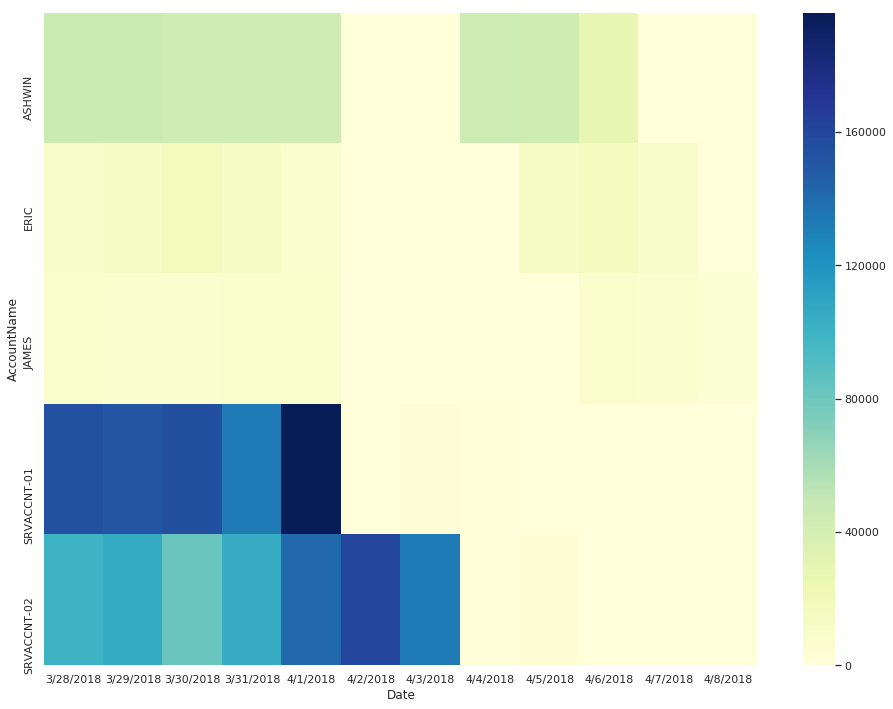

In [10]:
df_pivot = df.pivot(index='Date', columns='AccountName', values='LogonCount').fillna(0)
f, ax = plt.subplots(figsize=(16, 12))
hm1 = sns.heatmap(df_pivot.T,cmap="YlGnBu",ax=ax)

## Plotting Scatterplot for failed logons using seaborn library

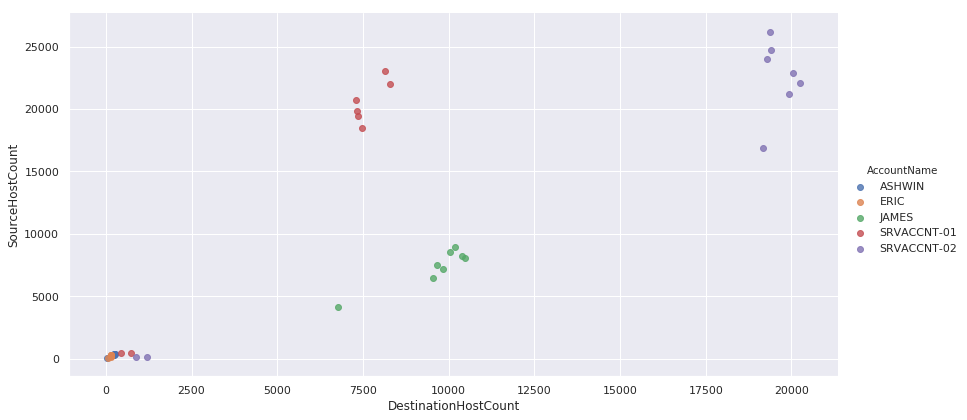

In [11]:
sns.lmplot(x='DestinationHostCount', y='SourceHostCount', data=df,
fit_reg=False,hue='AccountName', height=6, aspect=2)

### Observations:

There is inconsistent faied logons observed with account `SRVACCNT-01` and `SRVACCNT-02` which can be further investigated for any possible successful bruteforce activity.
- From the heatmaps, high number of failed logons were observed in first 4-6 days for 2 accounts and later it significantly reduced.  
- Scatterplot also shows,  failed logons were observed for `SRVACCNT-01` and `SRVACCNT-02` from high number of source addresses as compared to other accounts or for same accounts for the period of 7 days.

### Next Steps: 
### Each of below step can be subsequent individual parameterized queries against entire logon dataset for a week around the spike 
 - Investigate the the accounts which appears to be service account - `SRVACCNT01` and `SRVACCNT-02`.
 - Load the logon activity for both accounts prior and after the logon trend change. you can have parameterized query for the accounts against logondataset to pull and display the details.
 - Check the succesful logons observed from the accounts and investigate activity observed from the accounts for any suspicious activities e.g. process execution, group changes, scheduled tasks, service installations etc. This can also be achieved with follow-up query for all events observed from the accounts for the mentioned days in next cell.
 - Based on the displayed cells output and correlating logs, you can conclude if it is malicious activity or not.